# 1.	Introducere

## 1.1.	Scop
Scopul acestui proiect este de a dezvolta și implementa un sistem de recunoaștere a formelor cu ajutorul Convolutional Neural Networks (CNN) pentru identificarea tipurilor de plante (patrunjel, mărar și busuioc) în imagini. 
Acest sistem va fi o aplicație utilă în domeniul agricol și în identificarea plantelor. Scopul final este să dezvoltăm un model de învățare automată care poate clasifica cu precizie tipurile de plante din imagini, oferind astfel o soluție eficientă și automatizată.

## 1.2.	Context
În contextul evoluției tehnologiei și al creșterii interesului pentru agricultura de precizie, recunoașterea plantelor în imagini devine o sarcină din ce în ce mai importantă. 
Acest proiect vine în întâmpinarea acestei necesități și explorează abordarea folosind rețele neurale convoluționale (CNN). Rețelele CNN au demonstrat eficacitate într-o serie de aplicații de recunoaștere a obiectelor și au avansat semnificativ în domeniul învățării automate.
## 1.3.	Solutie

Soluția propusă constă în dezvoltarea și antrenarea unei rețele neurale convoluționale în limbajul de programare Python, folosind biblioteci precum TensorFlow. 
Această rețea va fi antrenată pe un set de date pe care l-am creat, care conține imagini cu trei tipuri de plante: patrunjel, mărar și busuioc. Procesul va implica extragerea unor caracteristici semnificative din imaginile de antrenament și ajustarea ponderilor rețelei pentru a realiza o clasificare precisă.

## 1.4.	Dataset
Setul de date creat pentru acest proiect conține aproximativ 100 de imagini pentru fiecare din cele trei tipuri de plante, adică patrunjel, mărar și busuioc. Dimensiunea totală a setului de date este de aproximativ 100MB. 
Imaginile au fost adunate și curățate pentru a asigura calitatea datelor. De asemenea, fiecare imagine este etichetată corect cu tipul de plantă pe care îl conține, ceea ce va servi drept anotare pentru antrenarea rețelei CNN.


In [3]:
%pip install tensorflow opencv-python matplotlib

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 2.6 MB/s eta 0:00:15
   ---------------------------------------- 0.2/38.1 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.4/38.1 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.5/38.1 MB 2.7 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.1 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.7/38.1 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.8/38.1 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.9/38.1 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.0/38.1 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.2/38.1 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.3/38.1 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.4/38.1 MB 2.6 MB/s eta 0:00:15
   - -


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
import imghdr


C:\Users\Tudor\AppData\Local\Temp\ipykernel_12976\3313151557.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
def clear_images(path):
    files = os.listdir(path)
    for file in files:
        if not (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png')):
            files.remove(file)

In [10]:
# remove duplicates
import hashlib

def remove_duplicates(path):
    hashes = set()
    directory = path

    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        digest = hashlib.sha1(open(path,'rb').read()).digest()
        if digest not in hashes:
            hashes.add(digest)
        else:
            os.remove(path)
# this works only for images with the same size

In [13]:
def display_images(path):
    files = os.listdir(path)
    show_images = files[:5]
    for file in show_images:
        img = mpimg.imread(os.path.join(path, file))
        plt.figure()
        plt.imshow(img)

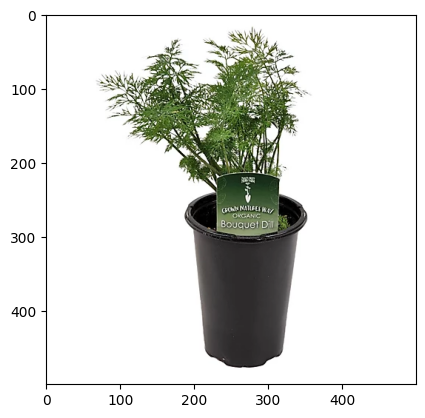

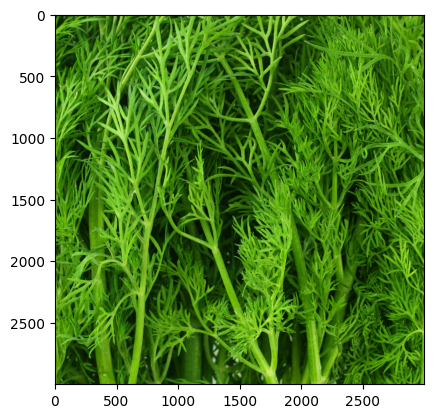

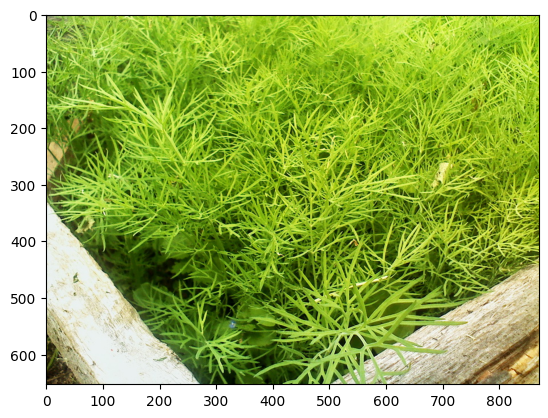

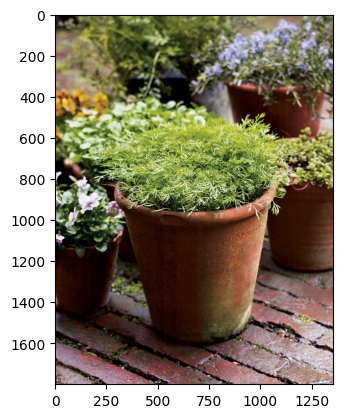

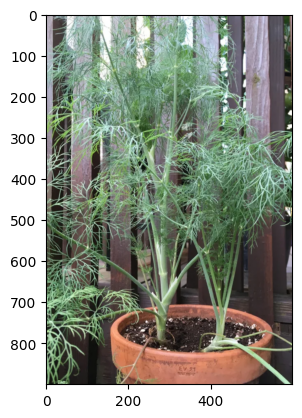

In [14]:
path = 'D:\\facultate\\An4sem1\\SRF\\proiect\\images\\marar'
clear_images(path)
display_images(path)

2. remove unwanted extensions

In [8]:
# yt
data_dir = 'images'
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [9]:
os.listdir(data_dir)

['busuioc', 'marar', 'patrunjel']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3. Load Data

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = tf.keras.preprocessing.image_dataset_from_directory('images') # building data pipeline

Found 570 files belonging to 3 classes.


In [13]:
data_iterator = data.as_numpy_iterator() # accessing data, allowing us to loop through it

In [14]:
batch = next(data_iterator) # getting the first batch

In [15]:
batch[0].shape # getting the shape of the first batch

(32, 256, 256, 3)

In [16]:
# 0 - busuioc
# 1 - marar
# 2 - patrunjel

batch[1]

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2])

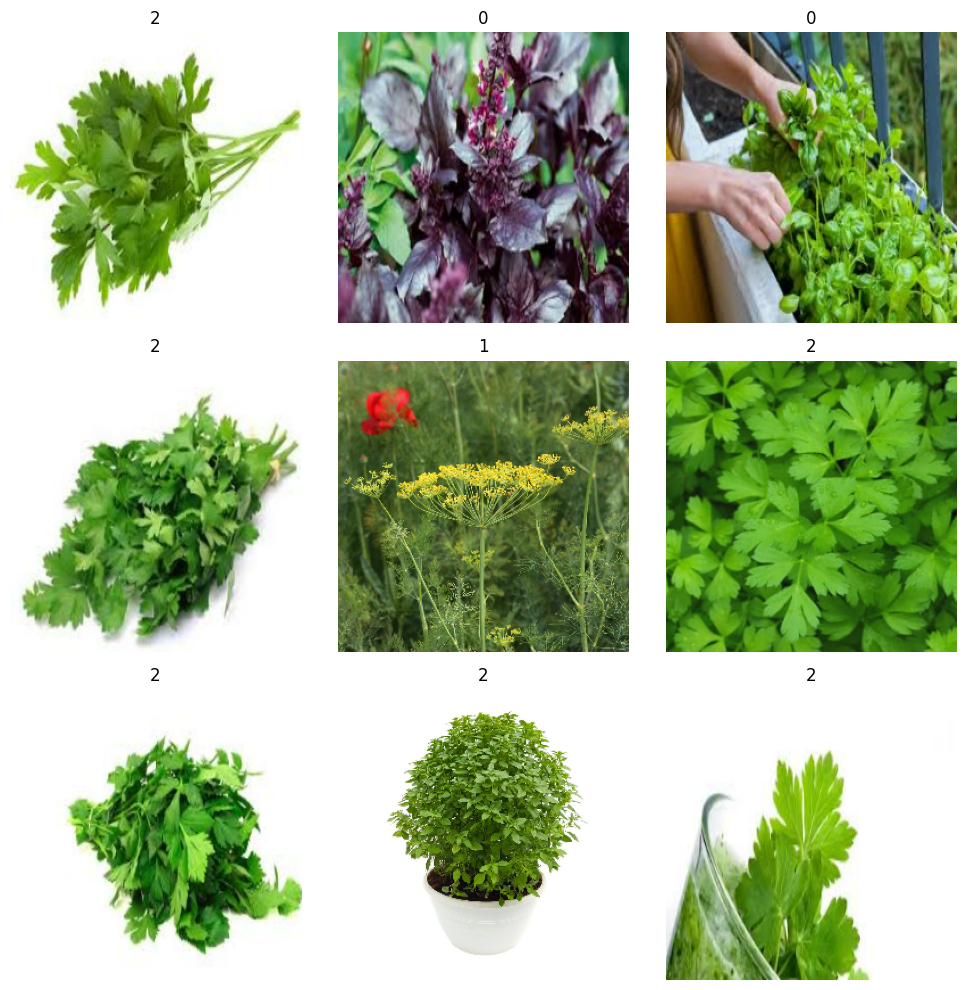

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, label, ax in zip(batch[0], batch[1], axes):
    ax.imshow(img.astype('uint8'))
    ax.axis('off')
    ax.set_title(label)
plt.tight_layout()
plt.show()


4. Preprocess Data

In [18]:
scaled = batch[0] / 255
scaled

array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [

In [19]:
data = data.map(lambda x, y: (x / 255, y)) # scaling the data
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()
batch[0].min()

0.0

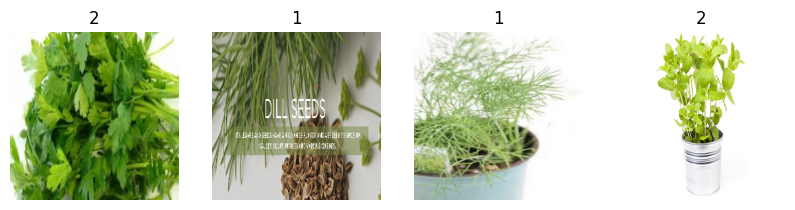

In [21]:
fig, ax = plt.subplots(ncols = 4, figsize=(10, 10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].axis('off')
    ax[idx].title.set_text(batch[1][idx])

6. Split Data

In [22]:
len(data)

18

In [23]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data)) + 1
test_size = int(0.1 * len(data)) + 1
train_size, val_size, test_size

(12, 4, 2)

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

7. Build CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

8. Train model

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 15s 1s/step - loss: 1.2548 - accuracy: 0.3620 - val_loss: 0.9956 - val_accuracy: 0.5625
Epoch 2/20
12/12 [==============================] - 13s 993ms/step - loss: 0.9795 - accuracy: 0.5469 - val_loss: 0.9191 - val_accuracy: 0.6250
Epoch 3/20
12/12 [==============================] - 11s 802ms/step - loss: 0.8311 - accuracy: 0.6224 - val_loss: 0.8316 - val_accuracy: 0.6016
Epoch 4/20
12/12 [==============================] - 13s 1s/step - loss: 0.8053 - accuracy: 0.6354 - val_loss: 0.6533 - val_accuracy: 0.8516
Epoch 5/20
12/12 [==============================] - 13s 984ms/step - loss: 0.6113 - accuracy: 0.7630 - val_loss: 0.6361 - val_accuracy: 0.7500
Epoch 6/20
12/12 [==============================] - 12s 880ms/step - loss: 0.5545 - accuracy: 0.7708 - val_loss: 0.5165 - val_accuracy: 0.8047
Epoch 7/20
12/12 [==============================] - 11s 860ms/step - loss: 0.4346 - accuracy: 0.8411 - val_loss: 0.4857 - val_accuracy: 0.7812
Epoch

9. Plot performance

In [ ]:
# get model from hist
model = hist.model

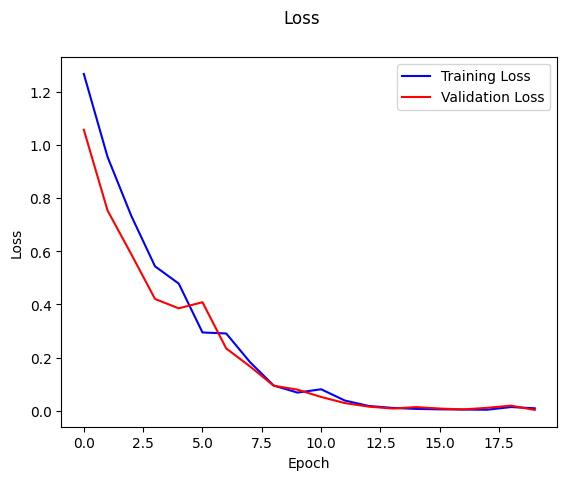

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label='Training Loss')
plt.plot(hist.history['val_loss'], color = 'red', label='Validation Loss')
fig.suptitle('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

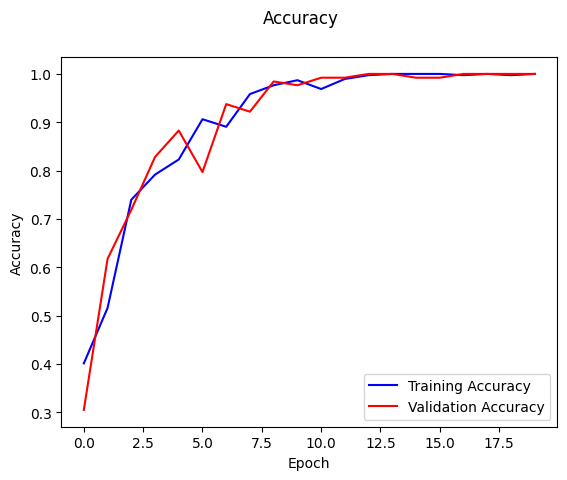

In [115]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'blue', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'red', label='Validation Accuracy')
fig.suptitle('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


10. Evaluate Performance

In [ ]:
%pip install sklearn seaborn

In [129]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 1.7 MB/s eta 0:00:06
   ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.2 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.2 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.2 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.2 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.2 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.2 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.2 MB 1.3 MB/s eta 0:00:07
   -- ---------


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# we need to evaluate precision, recall and accuracy for this model with 3 classes
# we will use the confusion matrix
# we will use the test dataset

from sklearn.metrics import confusion_matrix # confusion matrix is a table that is used to describe the performance of a classification model
import seaborn as sns


In [34]:

y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test], axis=0)

cm = confusion_matrix(y_true, y_pred)
cm

2/2 [==============================] - 2s 151ms/step


array([[ 5,  8,  5],
       [ 7, 12,  6],
       [ 4,  7,  4]], dtype=int64)

In [35]:
# the code for precision:

def precision(cm):
    precision = np.zeros(len(cm))
    for i in range(len(cm)):
        precision[i] = cm[i][i] / np.sum(cm[:, i])
    return precision

precision(cm)

array([0.3125    , 0.44444444, 0.26666667])

In [36]:
# the code for recall:

def recall(cm):
    recall = np.zeros(len(cm))
    for i in range(len(cm)):
        recall[i] = cm[i][i] / np.sum(cm[i, :])
    return recall

recall(cm)

array([0.27777778, 0.48      , 0.26666667])

In [37]:
# the code for accuracy:

def accuracy(cm):
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    return accuracy

accuracy(cm)

0.3620689655172414

11. Test model

In [41]:
import cv2

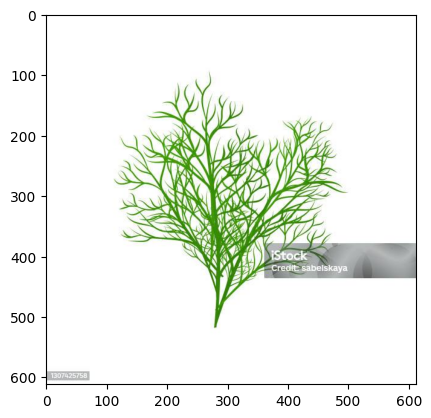

In [42]:
#img = cv2.imread('D:\\facultate\\An4sem1\\Licenta\\images\\busuioc\\5.jpg')
img = cv2.imread('test_dill.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

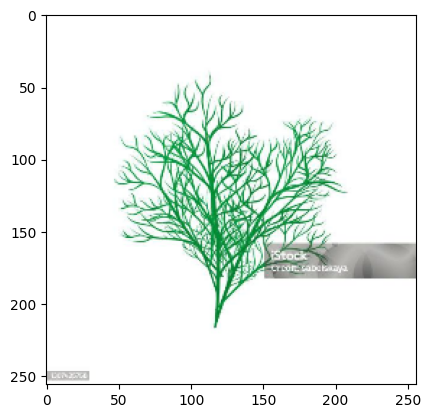

In [43]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [44]:
yhat = model.predict(resize.numpy().reshape(1, 256, 256, 3))
yhat


1/1 [==============================] - 0s 36ms/step


array([[0., 1., 0.]], dtype=float32)